# Problem Statement: Healthcare Analytics & Prediction of Length of Stay

#### _Recent Covid-19 Pandemic has raised alarms over the most overlooked areas of focus and one of them includes: Healthcare Mangement. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital._

#### _This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning._

#### _The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days._

In [1]:
# Importing the essential libraries to get started

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Reading the CSV file and importing the data

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


## Now we first check for missing variables in the data

In [4]:
df_train.isnull().sum()/df_train.shape[0]

case_id                              0.000000
Hospital_code                        0.000000
Hospital_type_code                   0.000000
City_Code_Hospital                   0.000000
Hospital_region_code                 0.000000
Available Extra Rooms in Hospital    0.000000
Department                           0.000000
Ward_Type                            0.000000
Ward_Facility_Code                   0.000000
Bed Grade                            0.000355
patientid                            0.000000
City_Code_Patient                    0.014232
Type of Admission                    0.000000
Severity of Illness                  0.000000
Visitors with Patient                0.000000
Age                                  0.000000
Admission_Deposit                    0.000000
Stay                                 0.000000
dtype: float64

In [5]:
# As we can check that there are very few rows which are missing the values from columns Bed Grade and City_Code_Patient
# Filling the values missing in the Bed Grade column first

df_train['Bed Grade'] = df_train.groupby(['Department', 'Hospital_code', 'Ward_Type'])['Bed Grade'].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [6]:
# Now to fill the values missing in the the City_Code_Patient columns we use the mode of the column

df_train['City_Code_Patient'].value_counts().index[0]

8.0

In [7]:
null_idx = df_train['City_Code_Patient'].isnull()
df_train['City_Code_Patient'][null_idx] = 8

In [8]:
# As we can check now there is no null value in any of the columns

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318438 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

## _Exploratory data analysis on the given dataset_

In [9]:
print('Number of unique Hospital_code = ', df_train.Hospital_code.nunique())
print('Number of unique Hospital_type_code = ', df_train.Hospital_type_code.nunique())
print('Number of unique City_Code_Hospital = ', df_train.City_Code_Hospital.nunique())
print('Number of unique Hospital_region_code = ', df_train.Hospital_region_code.nunique())
print('Number of unique Available Extra Rooms in Hospital = ', df_train['Available Extra Rooms in Hospital'].nunique())
print('Number of unique Ward_Type = ', df_train['Ward_Type'].nunique())
print('Number of unique Ward_Facility_Code = ', df_train['Ward_Facility_Code'].nunique())
print('Number of unique Bed Grade = ', df_train['Bed Grade'].nunique())
print('Number of unique patientid = ', df_train['patientid'].nunique())
print('Number of unique City_Code_Patient = ', df_train['City_Code_Patient'].nunique())
print('Number of unique Type of Admission = ', df_train['Type of Admission'].nunique())
print('Number of unique Severity of Illness = ', df_train['Severity of Illness'].nunique())
print('Number of unique Visitors with Patient = ', df_train['Visitors with Patient'].nunique())
print('Number of unique Age = ', df_train['Age'].nunique())

Number of unique Hospital_code =  32
Number of unique Hospital_type_code =  7
Number of unique City_Code_Hospital =  11
Number of unique Hospital_region_code =  3
Number of unique Available Extra Rooms in Hospital =  18
Number of unique Ward_Type =  6
Number of unique Ward_Facility_Code =  6
Number of unique Bed Grade =  4
Number of unique patientid =  92017
Number of unique City_Code_Patient =  37
Number of unique Type of Admission =  3
Number of unique Severity of Illness =  3
Number of unique Visitors with Patient =  28
Number of unique Age =  10


In [10]:
df_train.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

<AxesSubplot:ylabel='Hospital_code'>

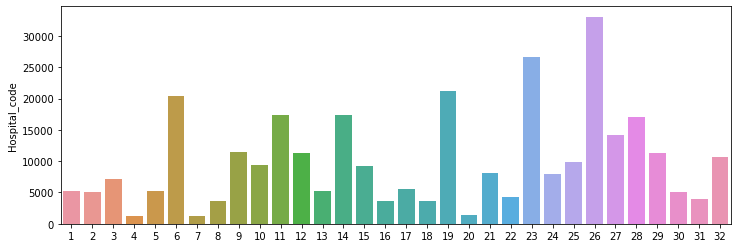

In [11]:
plt.figure(figsize = (12,4))
sns.barplot(x = df_train['Hospital_code'].value_counts().index, y = df_train['Hospital_code'].value_counts())

<AxesSubplot:ylabel='Department'>

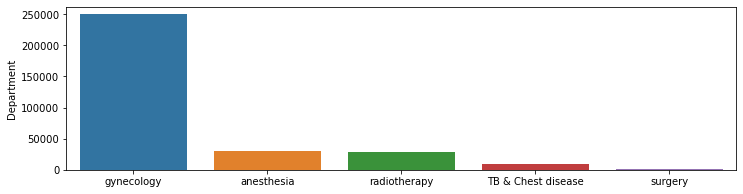

In [12]:
# To check which department has the most number of registered cases

plt.figure(figsize = (12,3))
sns.barplot(x = df_train['Department'].value_counts().index, y = df_train['Department'].value_counts())

<AxesSubplot:ylabel='City_Code_Patient'>

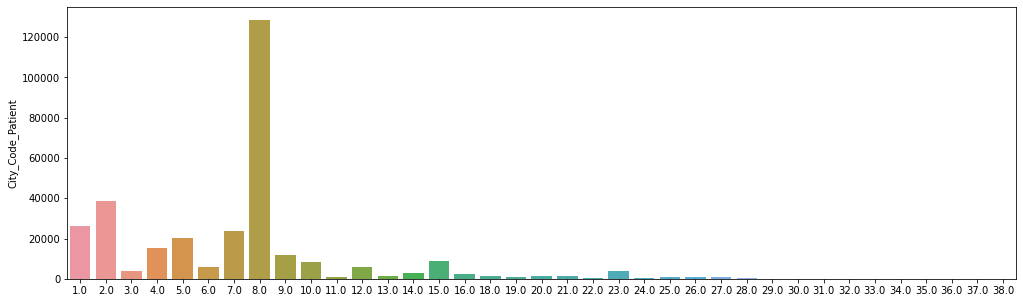

In [13]:
# City code for patient

plt.figure(figsize = (17,5))
sns.barplot(x = df_train['City_Code_Patient'].value_counts().index, y = df_train['City_Code_Patient'].value_counts())

#### _We can see that most of the patients from City Code 8 are admitted in the Hospitals with City code 7 or 2 which can also mean that these hospitals are nearby to the these patients living in City Code 8_

In [14]:
# As we can check the City Code for Patient 8 has a huge spike so let's try to find some more insights on this
# Let's check in which hospitals does Patients with city code 8 is admitted

df_train.loc[df_train['City_Code_Patient'] == 8]['City_Code_Hospital'].value_counts()

7     29862
2     25409
1     18664
6     14978
9      9791
3      9719
5      8288
4      3973
11     3785
10     2303
13     1771
Name: City_Code_Hospital, dtype: int64

#### _We can also come to the conclusion that people from the City code 8 are mostly admitted in the gynecology department_

In [15]:
df_train.loc[df_train['City_Code_Patient'] == 8]['Department'].value_counts()

gynecology            99818
radiotherapy          13139
anesthesia            11271
TB & Chest disease     3694
surgery                 621
Name: Department, dtype: int64

In [16]:
# Checking the stats for admission deposit

df_train['Admission_Deposit'].describe()

count    318438.000000
mean       4880.749392
std        1086.776254
min        1800.000000
25%        4186.000000
50%        4741.000000
75%        5409.000000
max       11008.000000
Name: Admission_Deposit, dtype: float64

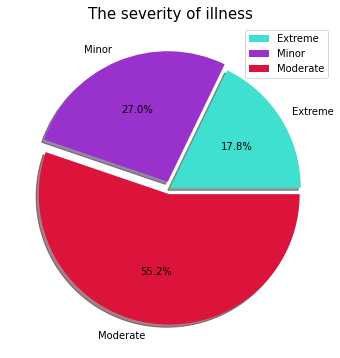

In [17]:
# Chart for Severity of Illness

plt.figure(figsize = (6,6))
slices = list(df_train['Severity of Illness'].value_counts().sort_index())
percentages = ['Extreme','Minor','Moderate']
colors = ['turquoise', 'darkorchid','crimson']
plt.pie(slices, labels = percentages, colors = colors, shadow = True, explode = (0,0.05,0.05), autopct = '%1.1f%%')
plt.title('The severity of illness', fontsize = 15)
plt.legend()

In [18]:
# Depending on the Severity of illness let's check how many visitors had a patient

df_train.groupby('Severity of Illness').aggregate(['max'])['Visitors with Patient']

,max
Severity of Illness,
Extreme,30
Minor,24
Moderate,32


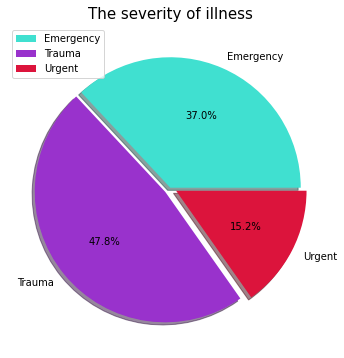

In [19]:
# Chart to see the type of admission

plt.figure(figsize = (6,6))
slices = list(df_train['Type of Admission'].value_counts().sort_index())
percentages = ['Emergency','Trauma','Urgent']
colors = ['turquoise', 'darkorchid','crimson']
plt.pie(slices, labels = percentages, colors = colors, shadow = True, explode = (0,0.05,0.05), autopct = '%1.1f%%')
plt.title('The severity of illness', fontsize = 15)
plt.legend(loc = 'upper left')

### Now lets try to find some valuable insights on the number of days of stay of a patient

####  Initial thoughts on what we could correlate with high LOS from features present in the dataset

- Severity of illness
- Type of admission
- Age
- Department
- Visitors of Patient

<AxesSubplot:ylabel='Stay'>

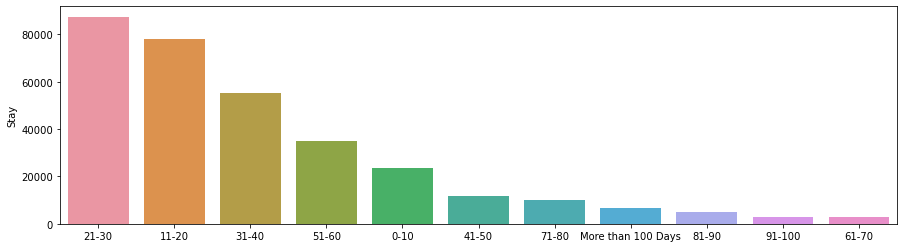

In [20]:
# Number of days of stay of a patient in the hospital

plt.figure(figsize = (15,4))
sns.barplot(x = df_train['Stay'].value_counts().index, y = df_train['Stay'].value_counts())

### Length of stay with respect to Severity of illness
- Here, we can see that the levels of extreme and minor severities of illnesses do change with a change in length of stay categories
- This feature seems to be particularly helpful in the model

In [21]:
s = df_train.groupby(['Severity of Illness', 'Stay']).size()
s = (s/s.groupby(level=1).sum()).reset_index()

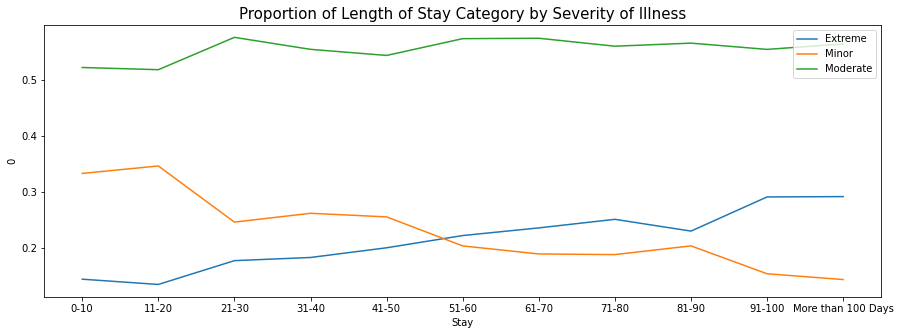

In [22]:
plt.figure(figsize = (15,5))
sns.lineplot(x = 'Stay', y = 0, hue = 'Severity of Illness', data = s)
plt.title('Proportion of Length of Stay Category by Severity of Illness', fontsize = 15)
plt.legend(loc = 'upper right')

### Length of Stay with respect to the type of admission
- We see that the proportion of urgent admissions decreasing over Length of Stay
- Overall its not yet clear how effective this feature might be to be added in the model

In [23]:
c = df_train.groupby(["Type of Admission", "Stay"]).size()
c = (c/c.groupby(level=1).sum()).reset_index()

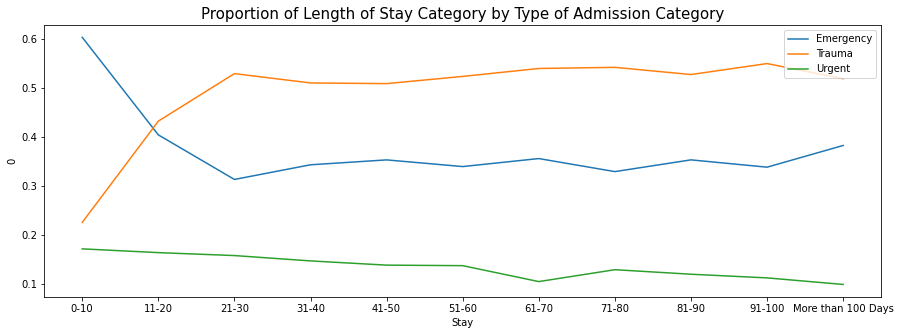

In [24]:
plt.figure(figsize = (15,5))
sns.lineplot(x = 'Stay', y = 0, hue = 'Type of Admission', data = c)
plt.title('Proportion of Length of Stay Category by Type of Admission Category', fontsize = 15)
plt.legend(loc = 'upper right')

### Checking for all the outliers in the data

#### _We can see that there are outliers in this column ' Available Extra Rooms in Hospital ' of the data and hence need to <br>remove it_

<AxesSubplot:>

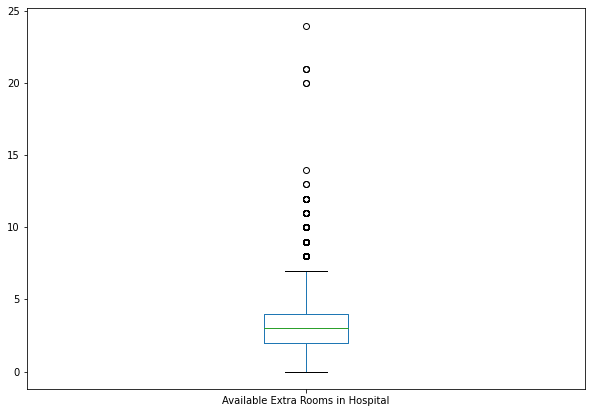

In [25]:
plt.figure(figsize=(10,7))
df_train['Available Extra Rooms in Hospital'].plot(kind = 'box')

In [26]:
Q1 = df_train['Available Extra Rooms in Hospital'].quantile(0.25)
Q3 = df_train['Available Extra Rooms in Hospital'].quantile(0.75)
IQR = Q3 - Q1
cutoff = IQR*1.5
lower = Q1-cutoff
upper = Q3+cutoff

In [27]:
df_train = df_train[(df_train['Available Extra Rooms in Hospital']>=lower) & (df_train['Available Extra Rooms in Hospital']<=upper)]

<AxesSubplot:>

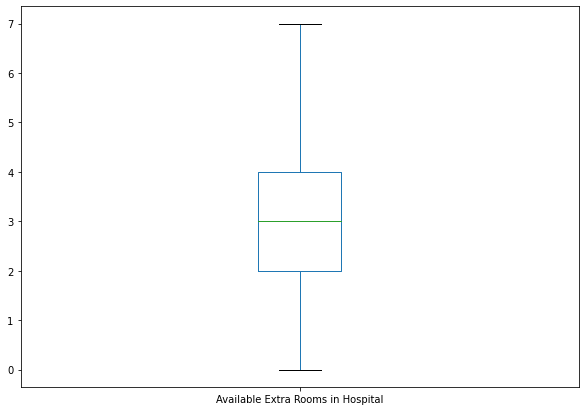

In [28]:
plt.figure(figsize=(10,7))
df_train['Available Extra Rooms in Hospital'].plot(kind = 'box')

#### _We can see that there are outliers in this column ' Visitors with Patient ' of the data and hence need to remove it_

<AxesSubplot:>

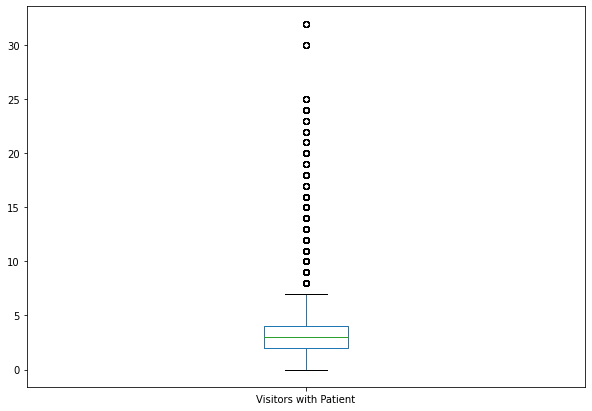

In [29]:
plt.figure(figsize=(10,7))
df_train['Visitors with Patient'].plot(kind = 'box')

In [30]:
Q1 = df_train['Visitors with Patient'].quantile(0.25)
Q3 = df_train['Visitors with Patient'].quantile(0.75)
IQR = Q3 - Q1
cutoff = IQR*1.5
lower = Q1-cutoff
upper = Q3+cutoff

In [31]:
df_train = df_train[(df_train['Visitors with Patient']>=lower) & (df_train['Visitors with Patient']<=upper)]

<AxesSubplot:>

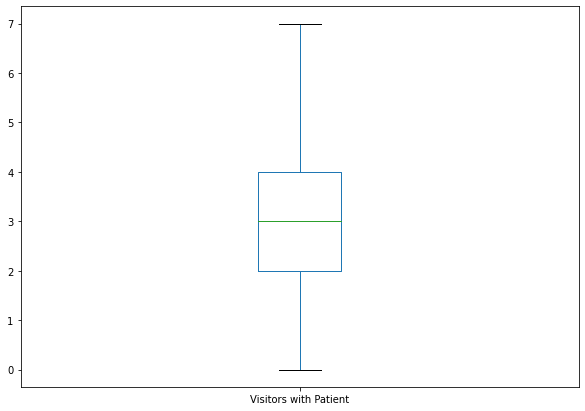

In [32]:
plt.figure(figsize=(10,7))
df_train['Visitors with Patient'].plot(kind = 'box')

## Removed the Outliers !!

## Encoding the categorical variables

In [33]:
# Lets check for all the categorical columns

cat_cols = df_train.select_dtypes(['object']).columns.tolist()
cat_cols

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Stay']

### Encoding the Age column manually

In [34]:
values = { '0-10':1, '11-20': 2,'21-30':3,'31-40':4,'41-50':5,'51-60':6,'61-70':7,'71-80':8,'81-90':9,'91-100':10   }
df_train['Age'] = df_train['Age'].map(values)

In [35]:
# Creating bins for the Age feature

age_bins = { 1:'Young', 2: 'Young',3:'Adult',4:'Adult',5:'Adult',6:'Aged',7:'Aged',8:'Aged',9:'Aged',10:'Aged'   }
df_train['Age'] = df_train['Age'].map(age_bins)

In [36]:
# We will be using Label Encoder to encode the categorical columns

LE = LabelEncoder()

In [37]:
cat_cols.remove('Stay')

for i in cat_cols:
    df_train[i] = LE.fit_transform(df_train[i])

In [38]:
df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,1,4911.0,0-10
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,1,5954.0,41-50
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,1,4745.0,31-40
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,1,7272.0,41-50
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,1,5558.0,41-50


# Splitting the data for training the model

In [39]:
X = df_train.drop(['Stay', 'case_id', 'patientid'], axis = 1)
Y = LE.fit_transform(df_train['Stay'])

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 1)

In [45]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn import metrics as mt
from sklearn.model_selection import KFold, cross_val_score

# ADA Boost

In [47]:
AB = AdaBoostClassifier()
AB.fit(X_train, Y_train)

AdaBoostClassifier()

In [49]:
AB_pred = AB.predict(X_train)

In [55]:
AB_acc_test = mt.accuracy_score(Y_train,AB_pred)
AB_acc_test

0.3734574070028493

In [50]:
print(mt.classification_report(Y_train, AB_pred))

              precision    recall  f1-score   support

           0       0.22      0.09      0.13     16544
           1       0.38      0.40      0.39     54550
           2       0.41      0.65      0.50     60614
           3       0.30      0.20      0.24     37482
           4       0.03      0.00      0.00      7968
           5       0.37      0.45      0.40     23213
           6       0.00      0.00      0.00      1785
           7       0.00      0.00      0.00      6231
           8       0.09      0.03      0.04      2674
           9       0.00      0.00      0.00      1574
          10       0.15      0.03      0.05      2506

    accuracy                           0.37    215141
   macro avg       0.18      0.17      0.16    215141
weighted avg       0.32      0.37      0.34    215141



In [51]:
AB_pred_test = AB.predict(X_test)

In [52]:
AB_acc_test = mt.accuracy_score(Y_test,AB_pred_test)
AB_acc_test

0.36924645351611646

# Gradient Boost

In [56]:
GB = GradientBoostingClassifier()
GB.fit(X_train,Y_train)

GradientBoostingClassifier()

In [58]:
GB_pred = GB.predict(X_train)

In [59]:
print(mt.classification_report(Y_train, GB_pred))

              precision    recall  f1-score   support

           0       0.42      0.13      0.20     16544
           1       0.42      0.51      0.46     54550
           2       0.43      0.66      0.52     60614
           3       0.42      0.19      0.26     37482
           4       0.78      0.00      0.01      7968
           5       0.40      0.53      0.46     23213
           6       0.85      0.02      0.04      1785
           7       0.82      0.00      0.01      6231
           8       0.37      0.23      0.29      2674
           9       0.94      0.01      0.02      1574
          10       0.45      0.10      0.16      2506

    accuracy                           0.42    215141
   macro avg       0.57      0.22      0.22    215141
weighted avg       0.45      0.42      0.38    215141



In [60]:
GB_acc_test = mt.accuracy_score(Y_train,GB_pred)
GB_acc_test

0.4201570133075518

In [61]:
GB_pred_test = GB.predict(X_test)

In [62]:
GB_acc_test = mt.accuracy_score(Y_test,GB_pred_test)
GB_acc_test

0.4131165676109496

# Support Vector machines

In [41]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(random_state = 1)
svm.fit(X_train, Y_train)